## Bayes' Theorem Explained
Bayes' theorem is crucial for interpreting the results from binary classification algorithms, and a most know for aspiring data scientists. We show how Bayes' theorem can be established using the results from a binary classification machine learning algorithm.

Author: Benjamin O. Tayo
Date: 5/7/2020

# 1. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
plt.style.use("ggplot")
%matplotlib inline

# 2. Exploratory Data Analysis

In [2]:
df=pd.read_csv("heights.csv")

In [3]:
df.head()

,sex,height
0,Male,75.0
1,Male,70.0
2,Male,68.0
3,Male,74.0
4,Male,61.0


<function matplotlib.pyplot.show>

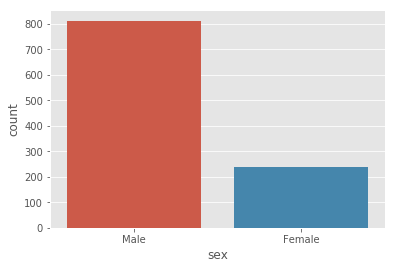

In [4]:
plt.figure()
sns.countplot(x="sex", data=df)
plt.show

In [5]:
df2 = df
df2['count']=range(df.shape[0])
df2.head()

,sex,height,count
0,Male,75.0,0
1,Male,70.0,1
2,Male,68.0,2
3,Male,74.0,3
4,Male,61.0,4


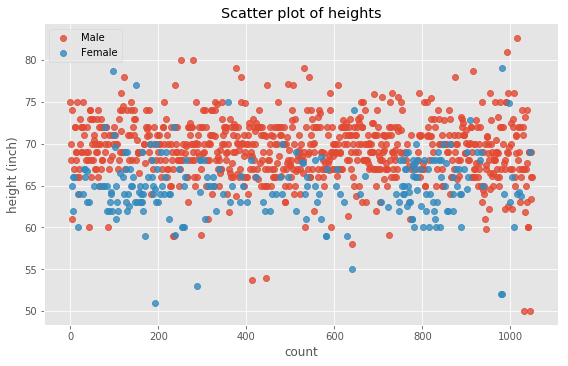

In [6]:
sns.lmplot( x="count", y="height", data=df2, hue='sex', legend=False, fit_reg=False, aspect=1.6)
plt.legend(loc='upper left')
plt.title('Scatter plot of heights')
plt.ylabel('height (inch)')
plt.show()

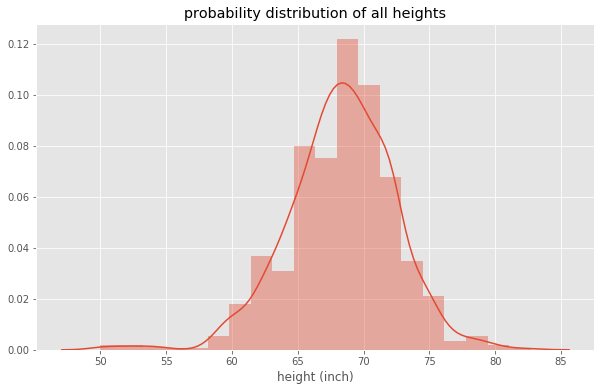

In [7]:
plt.figure(figsize=(10,6))
sns.distplot(df['height'],bins=20)
plt.title('probability distribution of all heights')
plt.xlabel('height (inch)')
plt.show()

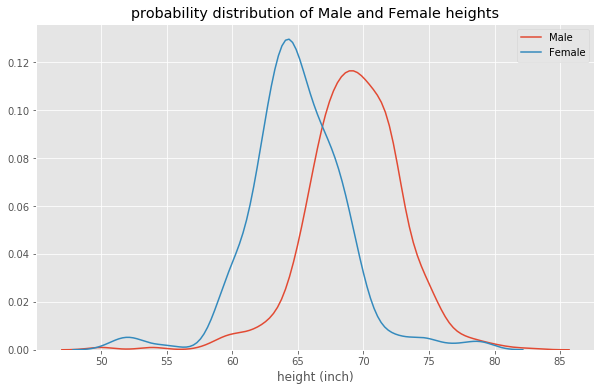

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(df[df.sex=='Male']['height'],bins=None, hist=False, label = 'Male')
plt.title('probability distribution of Male and Female heights')
sns.distplot(df[df.sex=='Female']['height'],bins=None, hist = False, label = 'Female')
plt.legend()
plt.xlabel('height (inch)')
plt.show()

# 3. Model Building and Evaluation

In [9]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['sex'].values)
pd.value_counts(y)

1    812
0    238
dtype: int64

In [10]:
X = df['height']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
X_train = X_train.values.reshape(X_train.shape[0],1)
X_test = X_test.values.reshape(X_test.shape[0],1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [11]:
knn.score(X_test, y_test)

0.8285714285714286

In [12]:
print(confusion_matrix(y_pred, y_test))

[[ 39  22]
 [ 32 222]]


In [13]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.64      0.55      0.59        71
          1       0.87      0.91      0.89       244

avg / total       0.82      0.83      0.82       315



## 4. Bayes' Theorem
Let 𝒚 = 𝑴 (1 is the positive class, and zero is the negative class) be event 𝐀, and $\hat{y} $ = M be event 𝐁, then we have (𝐁𝐚𝐲𝐞𝐬′𝐭𝐡𝐞𝐨𝐫𝐞𝐦):

$  P(\hat{y}=1~|~y=1) = {P(\hat{y}  ~=~ 1)~\times~ P(y ~=~ 1~|~\hat{y}~=~1) \over P(y ~=~ 1)} $

$ P(B/A) ~=~ { P(B)~\times~ P(A/B) \over P(A) }$

## $ P(y = 1~|~\hat{y}=1) $ 

In [14]:
P_AB = y_test[y_pred==1].sum()/np.sum(y_pred)

In [15]:
P_AB

0.8740157480314961

## $ P(y = 1) $

In [16]:
P_A = (y_test[y_pred==1].sum() + y_test[y_pred==0].sum())/len(y_test)

In [17]:
P_A

0.7746031746031746

## $P(\hat{y} =1) $

In [18]:
P_B = np.sum(y_pred)/len(y_pred)

In [19]:
P_B

0.8063492063492064

## Let's now calculate the following (using Bayes' theorem):
## $  P(\hat{y}=1~|~y=1) = {P(\hat{y} ~=~ 1)~\times~ P(y ~= 1~|~\hat{y} = 1) \over P(y ~=~ 1)} $

In [20]:
(P_B*P_AB)/P_A

0.9098360655737705

## Let's now use our code to calculate the following:
## $ P(\hat{y}=1~|~y=1) $

In [21]:
P_BA = y_pred[y_test==1].sum()/(y_test[y_pred==1].sum() + y_test[y_pred==0].sum())

In [22]:
P_BA

0.9098360655737705